# Data Wrangling
First Documentation about Introduction to Data Wrangling link:
http://localhost:8888/notebooks/Data%20Wrangling%20Introduction.ipynb

# Objectives
- Handle Missing data
- Data Type Correction
- Standardize and Normalize Data Attributes
- Visualize Data using Data Binning
- Convert Categorical Data to Numerical Variables

# Content

1. Import Libraries
2. Read CSV file into Pandas DataFrame
3. Identifying and Handling Missing Values
4. Data Type Correction
5. Data Standardaization and Normalization
6. Data Binning
7. Visualize Binned Data
8. Indicator Variables (Dummy Variables)

# 1. Import Libraries

**About %matplotlib inline**
A command used in Jupyter Notebook to tell it to display plots directly within the notebook itself right below the code cell  created rather than in a separate window or file. 

**import requests**
In able for Line 4 to be successful and resolve the **NameError**

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests

# 2. Read CSV file into Pandas DataFrame

*File Path provided by IBM Data Analysis Course in Coursera.*

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [4]:
# Define the URL from which to download the data
file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv'
response = requests.get(file_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a file named 'auto.csv'
    with open('laptops.csv', 'wb') as f:
        f.write(response.content)
    print("Download successful. File saved as 'auto.csv'")
else:
    print("Failed to download the file")

# Use pandas to read the CSV file into a DataFrame
file_path = 'laptops.csv'
df = pd.read_csv(file_path, header = 0)

# Display the first few rows of the DataFrame to check if the data is imported correctly
df.head()


Download successful. File saved as 'auto.csv'


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


### header = 0 explanation

<code>file_path = 'laptops.csv'
df = pd.read_csv(file_path, header = 0)</code>

When you read a CSV file into a DataFrame using <code>pd.read_csv()</code> in pandas, the header parameter determines which row in the CSV file is considered as the header, i.e., the row that contains the column names.

Use <code>header=0</code> when you are sure that the first row of the CSV file contains the column names. It is a good practice for clarity and explicitness in your code.

## Verify DataFrame Loading

Verify loading by displaying the dataframe summary using <code>df.info()</code>

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


None

## Verify DataFrame Columns

View the first 5 values of the updated dataframe using <code>df.head()</code>

In [6]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


#### np.round()

Update and round to nearest 2 decimal places the <code>Screen_Size-cm</code> column. Keep an eye of how <code>Screen_Size-cm</code> column changes.

In [7]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']], 2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


Checking how many rows there are in the dataset

In [8]:
df.tail()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
233,233,Lenovo,4,IPS Panel,2,1,7,35.56,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.78,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.48,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.62,2.5,6,256,2.40,883
237,237,Toshiba,3,Full HD,2,1,5,35.56,2.3,8,256,1.95,1499


# 3. Identifying and Handling Missing Values

## Check the dataset for missing values (NaN)

There could be NaN(Not a Number) values in the DataFrame, which could be objects in Pandas. However, since it is a huge dataset with 237 rows, it is time consuming to check one by one.

Check for NaN values **per column or for the entire DataFrame at once.** Here are some methods:

#### Per Column
<code>x = df.isnull().sum()</code> This will give the count of NaN values in each column of the DataFrame.

In [9]:
nan_per_column = df.isnull().sum()
nan_per_column

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

Result shows that Screen_Size_cm has 4 NaN values and Weight_kg has 5 NaN values.

#### Entire DataFrame
<code>x = df.isnull().sum().sum()</code>
This will give the total count of NaN values in the entire DataFrame.

In [10]:
# Check for NaN values in the entire DataFrame
nan_total = df.isnull().sum().sum()
print("Total NaN values in DataFrame:", nan_total)

Total NaN values in DataFrame: 9


Result shows that there are Total NaN values in DataFrame.

#### Use for loop

Identify the entries having Null values in all columns.
In the <code>missing_data</code> DataFrame, if missing = True, if not missing = False.

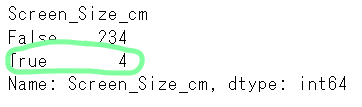
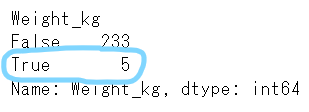

In [12]:
# Create new dataframe
missing_data = df.isnull()
# optional
print(missing_data.head())

# Initiate a for loop in the new DataFrame
for column in missing_data.columns.values.tolist():
    print(column)           #prints the name of the current column being processed
    print(missing_data[column].value_counts())    # calculates the count of True and False values
    print("")  # easier readability

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
False    238
Name: Unnamed: 0, dtype: int64

Manufacturer
False    238
Name: Manufacture

## Replace missing values

Remember that there are 2 ways to replace a missing value, by **frequency** or by **mean.**

### Replace with mean

How to replace the 5 missing values in <code>Weight_kg</code>? We can replace missing values by the **average value** of the entire variable.

In [13]:
# replace missing values with mean
# astype() function converts the values to the desired data type
# axis=0 indicates that the mean value is to calculated across all column elements in a row
avg_weight = df['Weight_kg'].astype('float').mean(axis = 0)

# replace(old_value, new_value)
# inplace=True, changes are made directly to the DataFrame df 
df['Weight_kg'].replace(np.nan, avg_weight, inplace = True)

print(df["Weight_kg"])

0      1.60
1      2.20
2      2.20
3      1.22
4      1.91
       ... 
233    1.70
234    1.20
235    1.36
236    2.40
237    1.95
Name: Weight_kg, Length: 238, dtype: float64


In [14]:
# Check again if replacing all NaN values are successful
nan_weight_kg = df['Weight_kg'].isnull().sum()
nan_weight_kg

0

### Replace with the most frequent value

The <code>Screen_Size_cm</code>, which also has 4 missing values, is categorical attribute in nature.
We can fill in these missing values by **using the size that appears most frequently** among the laptops' screen sizes.

The <code>idxmax()</code> method in pandas helps you find the row label (index) where the maximum value occurs in a DataFrame. It looks through the data and tells you which row has the highest value. This can be useful when you want to know the location of the highest value in your dataset.


In [24]:
# replacing missing data with mode
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()

# replace(old_value, new_value)
# inplace=True, changes are made directly to the DataFrame df 
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

print(df["Screen_Size_cm"])

0      35.56
1      39.62
2      39.62
3      33.78
4      39.62
       ...  
233    35.56
234    33.78
235    30.48
236    39.62
237    35.56
Name: Screen_Size_cm, Length: 238, dtype: float64


In [16]:
# Check again if replacing all NaN values are successful
nan_screen_size = df['Weight_kg'].isnull().sum()
nan_screen_size

0

# 4. Converting the data types

Both the <code>Weight_kg</code> and <code>Screen_Size_cm</code> are float data types so there is no need to convert. However, for practice purposes, this is the code how to convert data types in Pandas.
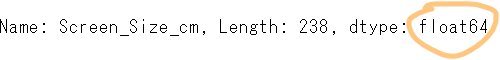
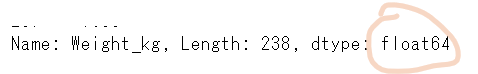

In [43]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")
print(df[["Weight_kg", "Screen_Size_cm"]].dtypes)

Weight_kg         float64
Screen_Size_cm    float64
dtype: object


# 5. Data Standardaization and Normalization

## Data Standardaization

It is sometimes unavoidable that the data is written into different formats as it is collected from different places by different people.

This is where data formatting comes in. **Data formatting(standardization)** is like putting all your information into a common language everyone can understand. It's a step in cleaning up your dataset where you make sure everything looks the same and makes sense. This consistency helps people compare and analyze the data without any confusion.

Looking at the head of the DataFrame again, there is a chance that <code>Screen_Size_cm</code> may have inputs of different measurments(ie. cm or inches). Descriptive statistics can be done to check for inconcistencies.

#### Descriptive Statistics
Use the <code>describe()</code> method by giving a summary of the data's main points like its **average, spread, and overall shape**, which saves time from having to look at each separate piece of data. This can be really useful when trying to understand the 'Screen_Size_cm' column in your DataFrame.


In [18]:
display(df.head())

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [44]:
# Assuming df is your DataFrame and 'Screen_Size_cm' is the column of interest
screen_size_stats = df['Screen_Size_cm'].describe()

# Print the descriptive statistics
print(screen_size_stats)

count    238.000000
mean      37.307395
std        2.960595
min       30.480000
25%       35.560000
50%       38.100000
75%       39.620000
max       43.940000
Name: Screen_Size_cm, dtype: float64


Provided results:

- The count indicates that there are 238 non-null values in the column.
- The mean screen size is approximately 37.31 cm.
- The standard deviation (std) is approximately 2.96 cm, indicating the variability of screen sizes around the mean.
- The minimum screen size is 30.48 cm, and the maximum screen size is 43.94 cm.

There doesn't appear to be any obvious inconsistencies in the data. However, it is good to further investigate any specific patterns or anomalies that could be present in the dataset.

### Standardize the measurement from cm to inches

Let's say it is decided to standardize the unit of measurement from cm to inches. The conversion of units can be done as the following:


In [22]:
display(df.head())

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### DO NOT RUN THIS CODE. OVERWRITES THE WHOLE ["Screen_Size_cm"]

DO NOT RUN THIS CODE. OVERWRITES THE WHOLE ["Screen_Size_cm"]
"""Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)
"""

### **Instead, create a new column <code>'Screen_Size_inch'</code> without overwriting the existing <code>'Screen_Size_cm'</code> column, you can use the following code:**

In [23]:
# Data standardization: convert screen size from cm to inch
df['Screen_Size_inch'] = df['Screen_Size_cm'] / 2.54
display(df.head())

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978,14.000000
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634,15.598425
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946,15.598425
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244,13.299213
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837,15.598425


Use descriptive statistics and check for outliers in the <code>Weight_kg</code> column as well.

In [25]:
# Assuming df is your DataFrame and 'Screen_Size_cm' is the column of interest
screen_weight_stats = df['Weight_kg'].describe()

# Print the descriptive statistics
print(screen_weight_stats)

count    238.000000
mean       1.862232
std        0.489090
min        0.810000
25%        1.472500
50%        1.862232
75%        2.200000
max        3.600000
Name: Weight_kg, dtype: float64


Provided results shows that:
- Count: There are 238 non-null entries for the weight of laptops in the dataset.
- Mean: The average weight of laptops is approximately 1.86 kilograms.
- Standard Deviation: The standard deviation, which measures the dispersion of weights around the mean, is approximately 0.49 kilograms.
- Minimum: The minimum weight recorded in the dataset is approximately 0.81 kilograms.

There doesn't appear to be any obvious inconsistencies in the data but let's just create a new columns for the weight in pounds unit.


### DO NOT RUN THIS CODE AS IT OVERWRITES THE WHOLE LOG

"""df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)
"""

The code provided will not overwrite the existing 'Weight_kg' column. Instead, it creates a new column named 'Weight_pounds

In [45]:
# Convert kilograms to pounds and create a new column 'Weight_pounds'
df['Weight_pounds'] = df['Weight_kg'] * 2.205
display(df.head())

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds,Price-binned
0,0,Acer,4,IPS Panel,2,1,5,35.56,0.55,8,256,1.60,978,14.000000,3.52800,Low
1,1,Dell,3,Full HD,1,1,3,39.62,0.69,4,256,2.20,634,15.598425,4.85100,Low
2,2,Dell,3,Full HD,1,1,7,39.62,0.93,8,256,2.20,946,15.598425,4.85100,Low
3,3,Dell,4,IPS Panel,2,1,5,33.78,0.55,8,128,1.22,1244,13.299213,2.69010,Low
4,4,HP,4,Full HD,2,1,7,39.62,0.62,8,256,1.91,837,15.598425,4.21155,Low


## Data Normalization

**Data normalization** is a way to make sure all the numbers in a dataset are in a similar range. It helps us compare different pieces of data more easily. We adjust the numbers so they're not too big or too small. This makes it simpler to understand and analyze the information.

Here, the <code>CPU_frequency</code> column can be normalized and rouned into 2 decimal places.

In [29]:
# Normalize CPU frequency and round to 2 decimal places
df['CPU_frequency'] = (df['CPU_frequency'] / df['CPU_frequency'].max()).round(2)
display(df.head())

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds
0,0,Acer,4,IPS Panel,2,1,5,35.56,0.55,8,256,1.60,978,14.000000,3.52800
1,1,Dell,3,Full HD,1,1,3,39.62,0.69,4,256,2.20,634,15.598425,4.85100
2,2,Dell,3,Full HD,1,1,7,39.62,0.93,8,256,2.20,946,15.598425,4.85100
3,3,Dell,4,IPS Panel,2,1,5,33.78,0.55,8,128,1.22,1244,13.299213,2.69010
4,4,HP,4,Full HD,2,1,7,39.62,0.62,8,256,1.91,837,15.598425,4.21155


# 6. Data Binning

Binning means putting similar things together in groups. In this case, create 3 bins for the attribute **Price**. These bins would be named **"Low", "Medium" and "High"**. The new attribute will be named **Price-binned**.

In [30]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
display(df.head())

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_inch,Weight_pounds,Price-binned
0,0,Acer,4,IPS Panel,2,1,5,35.56,0.55,8,256,1.60,978,14.000000,3.52800,Low
1,1,Dell,3,Full HD,1,1,3,39.62,0.69,4,256,2.20,634,15.598425,4.85100,Low
2,2,Dell,3,Full HD,1,1,7,39.62,0.93,8,256,2.20,946,15.598425,4.85100,Low
3,3,Dell,4,IPS Panel,2,1,5,33.78,0.55,8,128,1.22,1244,13.299213,2.69010,Low
4,4,HP,4,Full HD,2,1,7,39.62,0.62,8,256,1.91,837,15.598425,4.21155,Low


### Binning Code Breakdown

**1. Creating Bins:**

Divide the prices of items into different groups, or bins, to analyze them more easily. 

Create a set of numbers that evenly cover the range of prices.

Use <code>np.linspace(min(df["Price"]), max(df["Price"]), 4)</code> to create these numbers.

Here,  <code>min(df["Price"])</code> gives the smallest price in the dataset, and  <code>max(df["Price"])</code> gives us the largest.
The 4 means divides the range into 4 equal parts.


**2. Assigning Labels:**

Once the bins are created, it need names for each group.
Define the names for the groups as **'Low', 'Medium', and 'High'.**


**3. Performing Binning:**

Take the actual prices in the <code>Price</code> column and assign them to the appropriate group.

<code>pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)</code> does this.

It checks each price and decides which bin it belongs to based on the bins defined earlier.

If the price is within a certain range, it gets assigned the corresponding label **('Low', 'Medium', or 'High').**

**4. Creating a New Column:**

Create a new column in the DataFrame called  <code>Price-binned</code>.
This column will hold the labels ('Low', 'Medium', 'High') assigned to each price group.

### value_counts()
Count the occurrences of each category in the <code>Price-binned</code>
column 

In [31]:
# Print the count of each price category
print(df['Price-binned'].value_counts())

Low       160
Medium     72
High        6
Name: Price-binned, dtype: int64


# 7. Visualize Binned Data
### Plot the <code>Price</code> bins into a bar graph.

<code>plt.bar()</code> This function creates a bar plot using the specified data.
    
<code>group_names</code> This is the x-axis of the bar plot, which represents the different price groups **('Low', 'Medium', 'High').**
    
<code>df["Price-binned"].value_counts()</code>
This part calculates the frequency of each price group **('Low', 'Medium', 'High')** in the <code>Price-binned</code> column of the DataFrame.

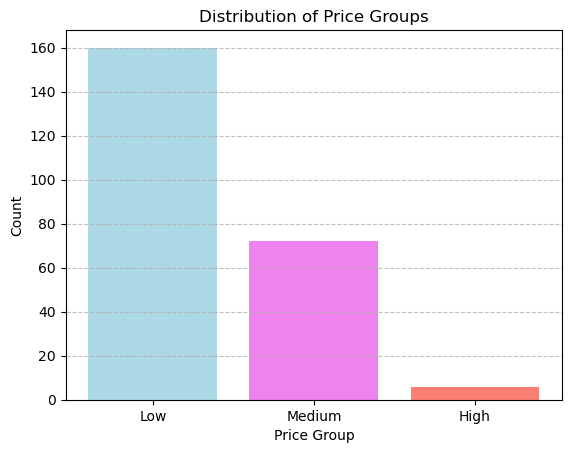

In [42]:
# Create the bar plot
plt.bar(group_names, df["Price-binned"].value_counts(), color=['lightblue', 'violet', 'salmon'])

# Add labels and title
plt.xlabel("Price Group")
plt.ylabel("Count")
plt.title("Distribution of Price Groups")

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Show plot
plt.show()

# 8. Indicator Variables (Dummy Variables)

### Converting Categorical Variables to Numerical Variables
The <code>Screen</code> attribute has categories like **IPS Panel** and **Full HD**. These categories are not numerical and cannot be directly used in mathematical computations but it can be represented from a categorical data into a numerical format which is helpful to have in **statistical models**. . Each category becomes a separate binary **(0 or 1)** variable.  

Keep the original <code>Screen</code> column in addition to creating a new dummy variable named <code>Original_Screen</code>.

### Code Breakdown

Use the <code>pd.get_dummies()</code> function form pandas to create dummies.

<code>rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'})</code>
Specifies the renaming operation. Uses the <code>rename()</code> method to rename the following:

<code>IPS Panel':'Screen-IPS_panel</code> 
'IPS Panel' to 'Screen-IPS_panel'

<code>Full HD':'Screen-Full_HD</code>
'Full HD' to 'Screen-Full_HD'.

<code>inplace=True</code>
Modifies the original DataFrame 

<code>concat()</code> function concatenate two DataFrames along the specified axis.
<code>axis =1</code>concatenation should be done along the columns.
axis = 0 is rows.

In [47]:
# Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)

# Add the indicator variables to the DataFrame
df = pd.concat([df, dummy_variable_1], axis=1)

# Keep the original "Screen" column as well by creating a new column
df['Original_Screen'] = df['Screen']

In [49]:
display(df.head())

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,...,Weight_kg,Price,Screen_Size_inch,Weight_pounds,Price-binned,Screen-Full_HD,Screen-IPS_panel,Original_Screen,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,IPS Panel,2,1,5,35.56,0.55,8,...,1.60,978,14.000000,3.52800,Low,0,1,IPS Panel,0,1
1,1,Dell,3,Full HD,1,1,3,39.62,0.69,4,...,2.20,634,15.598425,4.85100,Low,1,0,Full HD,1,0
2,2,Dell,3,Full HD,1,1,7,39.62,0.93,8,...,2.20,946,15.598425,4.85100,Low,1,0,Full HD,1,0
3,3,Dell,4,IPS Panel,2,1,5,33.78,0.55,8,...,1.22,1244,13.299213,2.69010,Low,0,1,IPS Panel,0,1
4,4,HP,4,Full HD,2,1,7,39.62,0.62,8,...,1.91,837,15.598425,4.21155,Low,1,0,Full HD,1,0
